## Overview

13,580 observations showing homes for sale in Melbourn. They are posted from '2016-03-12' to '2017-09-23'.

My goal is to provide real estate data query function in any area in Melbourne, Overview house market data, and evaluation of factors and weights that affect house prices.

#### Query the summary of the real estate data in the selected area:

#### Analysis and summary of the overall market:

#### Factors affecting house prices;

#### Questions:
#### For Selected region,
#### 1. How many properties were on the list?
#### 2. Who are the best sellers?
#### 3. What’s the average price of different house types?
#### 4. What’s the land size range?
#### 5. What’s the top 5 region by average house price?
#### 5. If the price of property rises by year?
#### 6. Best seller?
#### 7. If the land size increases by year?
#### 8. Any relationship between price and Landsize?

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
#import geopandas

In [2]:
# defaut setting
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

## Overview Dataset

In [3]:
df_melb = pd.read_csv('melb_data.csv')

In [4]:
df_melb.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [5]:
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df_melb.isnull().sum().sort_values(ascending = False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [7]:
df_melb.describe(include = 'object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [8]:
df_melb.duplicated().sum()

0

#### Total records: 13,580
#### 6450 NA in 'BuildingArea'; 5375 NA in 'YearBuilt'; 1369 NA in 'CouncilArea'; 62 NA in 'Car'

## Query data in selected Region

In [16]:
df_melb.groupby(['Suburb']).count().sort_values(by='Address',ascending = False)[:5] # Reservoir got most data 359

,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Suburb,,,,,,,,,,,,,,,,,,,,
Reservoir,359,359,359,359,359,359,359,359,359,359,359,359,359,174,203,323,359,359,359,359
Richmond,260,260,260,260,260,260,260,260,260,260,260,259,260,148,170,251,260,260,260,260
Bentleigh East,249,249,249,249,249,249,249,249,249,249,249,249,249,123,135,234,249,249,249,249
Preston,239,239,239,239,239,239,239,239,239,239,239,239,239,111,124,229,239,239,239,239
Brunswick,222,222,222,222,222,222,222,222,222,222,222,221,222,136,148,208,222,222,222,222


In [29]:
# Choose 'Reservoir' 
df_Reservoir = df_melb[df_melb['Suburb'] == 'Reservoir'] 

In [30]:
# Split year
df_Reservoir['Year'] = df_Reservoir['Date'].apply(lambda x: x[-4:])

In [31]:
# Numbers of Properties on Sale in 2016 and 2017
df_Reservoir_2016 = df_Reservoir.loc[df_Reservoir['Year'] == '2016']
df_Reservoir_2017 = df_Reservoir.loc[df_Reservoir['Year'] == '2017']
df_2016_count = df_Reservoir_2016['Type'].value_counts()
df_2017_count = df_Reservoir_2017['Type'].value_counts()
df_2016_total = df_Reservoir_2016['Type'].count()
df_2017_total = df_Reservoir_2017['Type'].count()
labels  =['House','Unit','Townhouse']

Text(0.5, 1.0, '160 Properties on Sale in 2017')

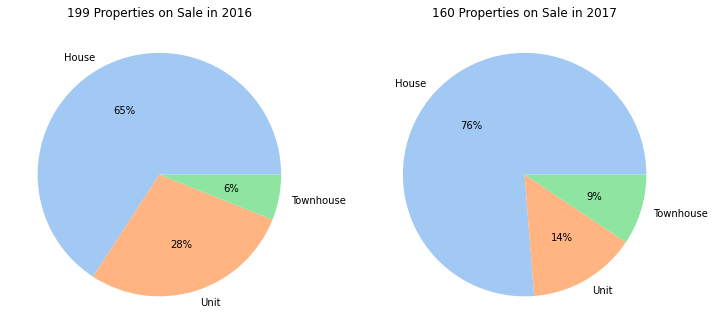

In [32]:
# Plot number of properties on Sale in two years.

colors = sns.color_palette('pastel')[0:3]
f = plt.figure(figsize = (12,6))
f1 = f.add_subplot(1,2,1)
plt.pie(df_2016_count, labels = labels, colors = colors, autopct= "%d%%")
plt.title('%d Properties on Sale in 2016' %df_2016_total)


f2 = f.add_subplot(1,2,2)
plt.pie(df_2017_count, labels = labels, colors = colors, autopct= "%d%%")
plt.title('%d Properties on Sale in 2017' %df_2017_total)


### Q : 1. How many properties were on the list?
#### In Reservoir, Unit on list in 2017 were far less than that in 2016. After verifing this in other region,no obviously trend.

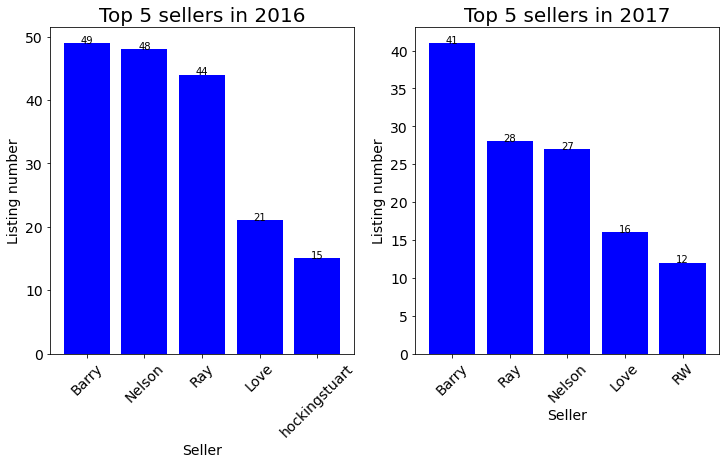

In [36]:
# Plot top 5 sellers

df_seller_2016 = df_Reservoir_2016['SellerG'].value_counts()[:5]
df_seller_2017 = df_Reservoir_2017['SellerG'].value_counts()[:5]


'''df_melb['Year'] = df_melb['Date'].apply(lambda x:x[-4:])
df_melb['Month'] = df_melb['Date'].apply(lambda x:x[-7:-5])
df_2016 = df_melb[df_melb['Year']=='2016'] 
df_2016.count()#6336

df_melb['Year'] = df_melb['Date'].apply(lambda x:x[-4:])
df_melb['Month'] = df_melb['Date'].apply(lambda x:x[-7:-5])
df_2017 = df_melb[df_melb['Year']=='2017'] 

df_seller_2016 = df_2016['SellerG'].value_counts()[:5]
df_seller_2017 = df_2017['SellerG'].value_counts()[:5]'''

f = plt.figure(figsize = (12,6))

f1 = f.add_subplot(1,2,1)
plt.bar(df_seller_2016.index,df_seller_2016.values,color='b')
plt.title('Top 5 sellers in 2016',fontsize=20)
plt.xlabel('Seller',fontsize=14)
plt.ylabel('Listing number',fontsize = 14)
plt.tick_params(labelsize = 14)
plt.xticks(rotation = 45)
for a,b in zip(df_seller_2016.index,df_seller_2016.values):
    plt.text(a,b,b,fontsize=10,ha='center')

f2 = f.add_subplot(1,2,2)
plt.bar(df_seller_2017.index,df_seller_2017.values,color='b')
plt.title('Top 5 sellers in 2017',fontsize=20)
plt.xlabel('Seller',fontsize=14)
plt.ylabel('Listing number',fontsize = 14)
plt.tick_params(labelsize = 14)
plt.xticks(rotation = 45)
for a,b in zip(df_seller_2017.index,df_seller_2017.values):
    plt.text(a,b,b,fontsize=10,ha='center')

### 2. Who are the best sellers?
#### In Reservior, Compared 2016, The listing dropped in 2017. The Best sales was Barry.Ray ranked 2, surpassing Nelson.
#### Compared the whole city, Nelson was champion sales....

In [14]:
# The average house price
df_Price_mean = df_Reservoir.groupby(['Type','Year'])['Price'].mean().reset_index()
df_Price_mean

,Type,Year,Price
0,h,2016,748000.000000
1,h,2017,827505.737705
2,t,2016,507208.333333
3,t,2017,625833.333333
4,u,2016,396589.285714
5,u,2017,482021.739130


[Text(0.5, 1.0, 'The Average House Price')]

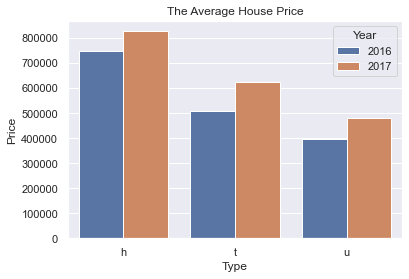

In [15]:
# Plot Average House price
sns.set_theme(style = 'darkgrid')
sns.barplot(x = 'Type',y = 'Price',hue = 'Year',data =df_Price_mean).set(title = 'The Average House Price')


In [16]:
df_Reservoir['Landsize'].min() #0.0
#df_Reservoir[df_Reservoir['Landsize'] == 0] # count 22

0.0

<AxesSubplot:xlabel='Type', ylabel='Landsize'>

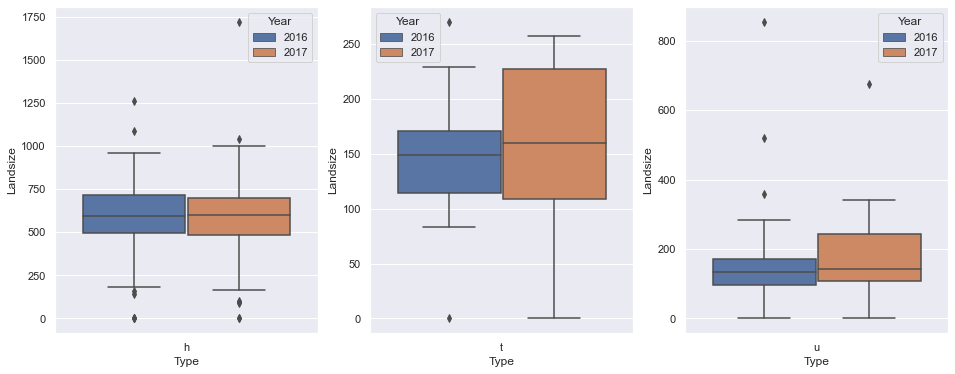

In [17]:
df_house = df_Reservoir[df_Reservoir['Type'] == 'h']
df_townhouse = df_Reservoir[df_Reservoir['Type'] == 't']
df_unit = df_Reservoir[df_Reservoir['Type'] == 'u']

df_house_filter = df_house[df_house['Landsize']<4000] # filter 2 outliers > 4000

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

sns.boxplot(x=df_house_filter['Type'],y=df_house_filter['Landsize'],hue=df_house_filter['Year'],ax = axs[0])
sns.boxplot(x=df_townhouse['Type'],y=df_townhouse['Landsize'],hue=df_townhouse['Year'],ax = axs[1])
sns.boxplot(x=df_unit['Type'],y=df_unit['Landsize'],hue=df_unit['Year'],ax = axs[2])


In [20]:
# Price trend
df_melb['Year'] = df_melb['Date'].apply(lambda x:x[-4:])
df_melb['Month'] = df_melb['Date'].apply(lambda x:x[-7:-5])
df_2016 = df_melb[df_melb['Year']=='2016'] 
df_2016.count()#6336

df_melb['Year'] = df_melb['Date'].apply(lambda x:x[-4:])
df_melb['Month'] = df_melb['Date'].apply(lambda x:x[-7:-5])
df_2017 = df_melb[df_melb['Year']=='2017'] 


In [22]:
df_2016_price_mean_month = df_2016.groupby(['Month'])['Price'].mean().reset_index()
df_2016_price_mean_month


,Month,Price
0,01,1.009000e+06
1,02,9.081827e+05
2,04,9.960432e+05
3,05,1.046063e+06
4,06,1.048369e+06
5,07,9.412970e+05
6,08,1.073529e+06
7,09,1.099378e+06
8,10,1.065341e+06
9,11,1.117513e+06


In [23]:
df_2017_price_mean_month = df_2017.groupby(['Month'])['Price'].mean().reset_index()
df_2017_price_mean_month

,Month,Price
0,02,1.116604e+06
1,03,1.141256e+06
2,04,1.029317e+06
3,05,1.134087e+06
4,06,1.095005e+06
5,07,8.874402e+05
6,08,1.197994e+06
7,09,1.168031e+06


<AxesSubplot:xlabel='Month', ylabel='Price'>

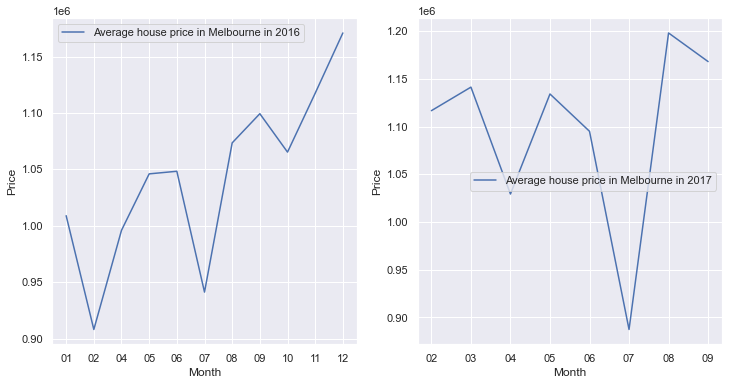

In [27]:
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))  
sns.lineplot(x = df_2016_price_mean_month['Month'],y = df_2016_price_mean_month['Price'], label = 'Average house price in Melbourne in 2016',ax=axs[0])

sns.lineplot(x = df_2017_price_mean_month['Month'],y = df_2017_price_mean_month['Price'], label = 'Average house price in Melbourne in 2017',ax=axs[1])

In [28]:
df_melb[df_melb['Month'] == '07']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
16,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,16/07/2016,2.5,3067.0,3.0,2.0,1.0,113.0,110.0,1880.0,Yarra,-37.80560,144.99300,Northern Metropolitan,4019.0,2016,07
17,Abbotsford,78 Yarra St,3,h,1176500.0,S,LITTLE,16/07/2016,2.5,3067.0,2.0,1.0,1.0,138.0,105.0,1890.0,Yarra,-37.80210,144.99650,Northern Metropolitan,4019.0,2016,07
33,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,26/07/2016,2.5,3067.0,1.0,1.0,1.0,0.0,50.0,2013.0,Yarra,-37.80550,144.99610,Northern Metropolitan,4019.0,2016,07
37,Abbotsford,27 Charles St,2,h,1030000.0,S,Biggin,30/07/2016,2.5,3067.0,2.0,1.0,1.0,172.0,81.0,1930.0,Yarra,-37.80860,144.99460,Northern Metropolitan,4019.0,2016,07
58,Airport West,4/54 Hawker St,2,u,462500.0,S,Barry,16/07/2016,13.5,3042.0,2.0,1.0,1.0,164.0,NaN,2003.0,Moonee Valley,-37.72180,144.88630,Western Metropolitan,3464.0,2016,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,Williamstown,87 Pasco St,3,h,1285000.0,S,Jas,29/07/2017,6.8,3016.0,3.0,1.0,0.0,296.0,NaN,NaN,Hobsons Bay,-37.86335,144.89487,Western Metropolitan,6380.0,2017,07
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,2.0,1.0,1.0,0.0,61.6,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0,2017,07
12210,Wollert,60 Saltlake Bvd,3,h,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,3.0,2.0,2.0,400.0,NaN,NaN,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0,2017,07
12211,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,2.0,1.0,2.0,269.0,NaN,NaN,Maribyrnong,-37.81649,144.86731,Western Metropolitan,6543.0,2017,07


In [30]:
df_melb[df_melb['Year'] == '2017'].count()# 2016:6336 2017:7244

Suburb           7244
Address          7244
Rooms            7244
Type             7244
Price            7244
Method           7244
SellerG          7244
Date             7244
Distance         7244
Postcode         7244
Bedroom2         7244
Bathroom         7244
Car              7182
Landsize         7244
BuildingArea     3526
YearBuilt        4063
CouncilArea      5875
Lattitude        7244
Longtitude       7244
Regionname       7244
Propertycount    7244
Year             7244
Month            7244
dtype: int64

In [48]:
df_price_suburb = df_melb.groupby(['Suburb','Year'])['Price'].mean().reset_index()
df_price_suburb.sort_values(by = 'Price',ascending = False)[:5]
#sns.barplot(x = df_price_suburb['Suburb'], y=df_price_suburb['Price'])

,Suburb,Year,Price
264,Kooyong,2017,3.080000e+06
287,Middle Park,2017,2.536529e+06
93,Canterbury,2017,2.509292e+06
8,Albert Park,2017,2.063319e+06
156,Eaglemont,2017,2.032778e+06


In [40]:
result = np.corrcoef(df_melb['Price'],df_melb['Bathroom'])
result

array([[1.        , 0.46703818],
       [0.46703818, 1.        ]])

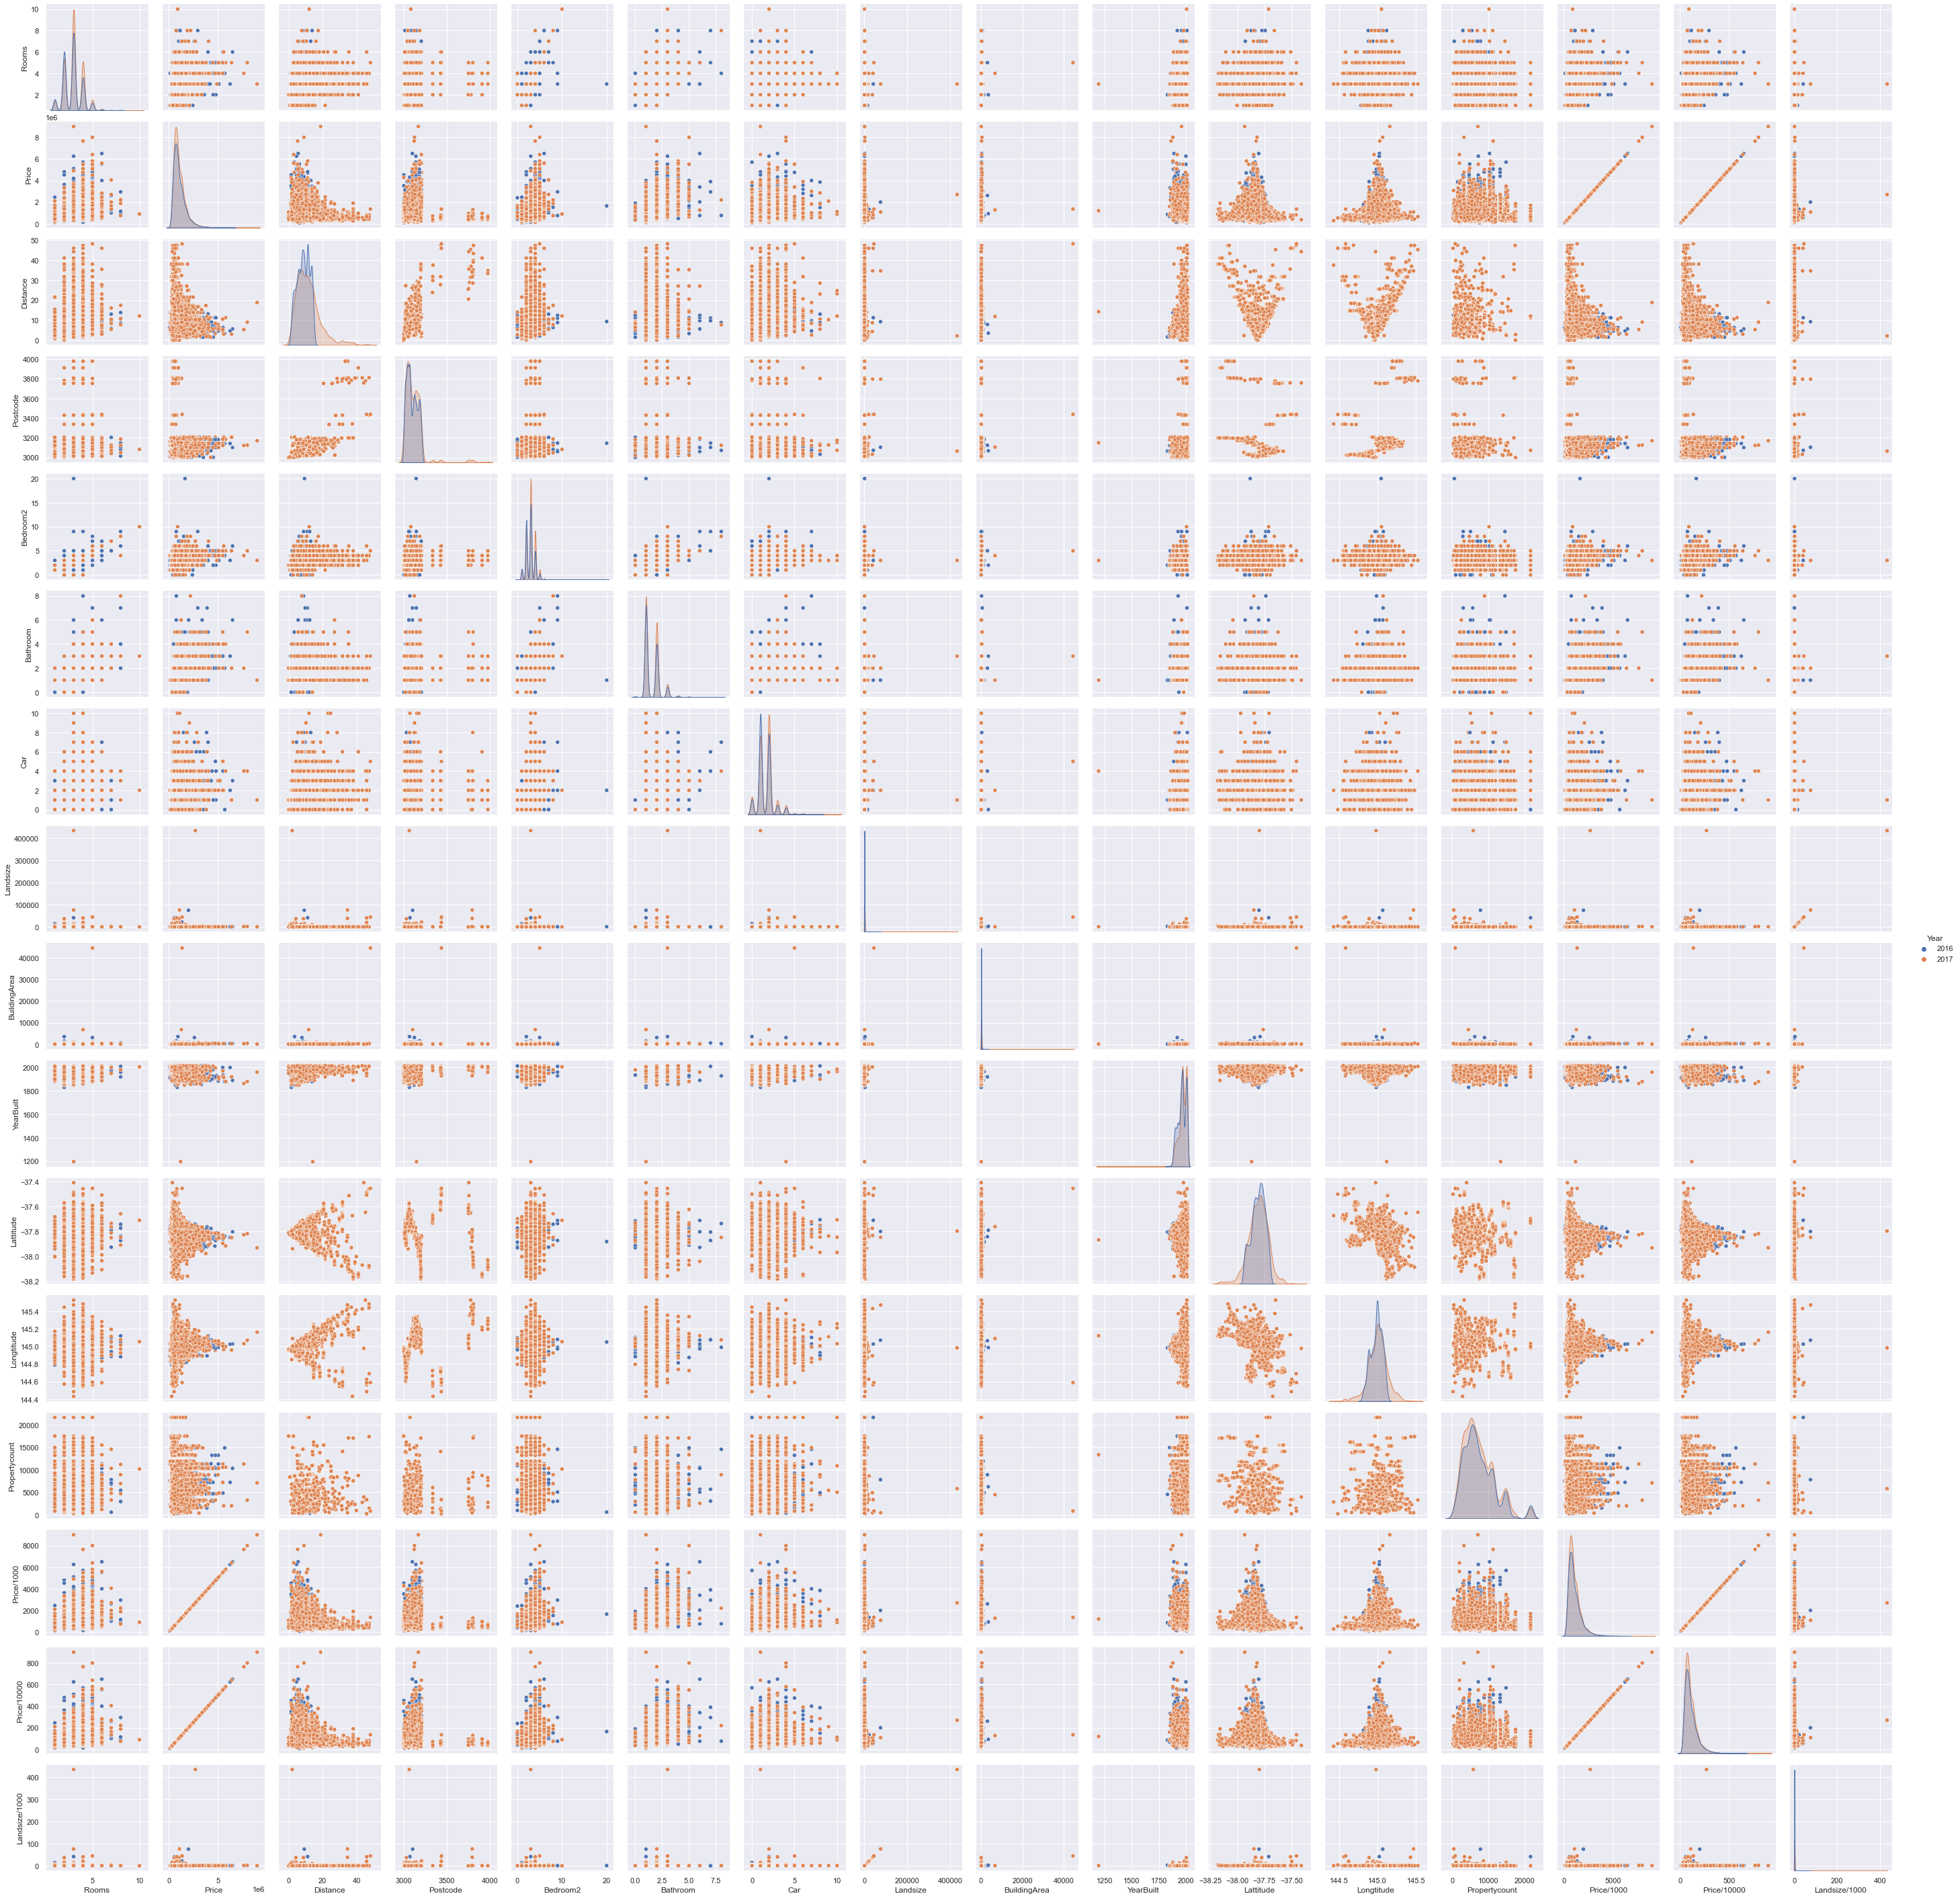

In [42]:
sns.pairplot(df_melb,hue = 'Year')
plt.show()